In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import plotly.express as px
import squarify
import plotly.graph_objects as go

# Load datasets

In [3]:
consequence= pd.read_csv('../db_tables/consequence.tsv', sep='\t')
mutations = pd.read_csv('../db_tables/mutation.tsv', sep='\t').merge(consequence)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
# Traer los nombres de las prote
proteins = pd.read_csv('../db_tables/protein.tsv', sep='\t', usecols=['id_protein', 'uniprot_acc', 'uniprot_name'])
prot_mutation = mutations.merge(proteins)[
    ['id_mutation',	'snp_id', 'start_aa', 'end_aa',	'consequence', 'uniprot_acc', 'uniprot_name']
]
prot_mutation.uniprot_name = prot_mutation.uniprot_name.str.split("_").str[0] # delete "_HUMAN"
# Group
prot = prot_mutation.groupby('uniprot_name')['id_mutation'].count().sort_values(ascending= False)

In [103]:
prot_others = pd.Series({'others': prot[10:].sum()})
prot_topten = prot
# prot_topten = prot[:1000]
prot_topten_others= pd.concat([prot_others, prot_topten])

In [84]:
prot_topten

uniprot_name
TITIN    20552
BRCA2    12063
APC       9237
BRCA1     9177
ATM       8472
         ...  
GRM2       412
DC1I1      412
DNLI1      412
RC3H2      412
STK10      412
Name: id_mutation, Length: 1000, dtype: int64

# Mutations plots

## Mutations donnut

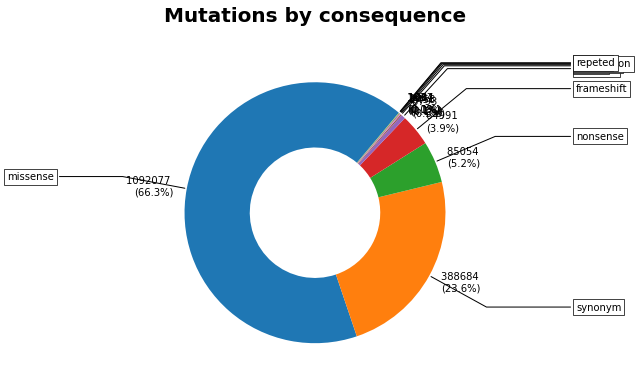

In [4]:
# %% Mutations by consequence Donut
#plt.style.use('seaborn-pastel')
cq = mutations.consequence.value_counts()
labels = cq.index
sizes = cq
pcts = [f'{s} \n({s*100/sum(sizes):.1f}%)' for s in sizes]
#width = 0.35

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle= 50, labels= pcts) #, rotatelabels=True

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(cq.index[i], xy=(x, y), xytext=(2*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Mutations by consequence\n", fontsize=20, weight= 'bold')

plt.show()

## Mutations Treemap

In [11]:
labels

Index(['missense', 'synonym', 'nonsense', 'frameshift', 'deletion', 'delins',
       'insertion', 'duplication', 'nostop', 'repeted'],
      dtype='object')

In [14]:
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [161]:
fig = px.treemap(
    data_frame = consequence,
    #names = consequence.consequence.tolist(),
    path= ['consequence'],
    values= sizes.tolist(),
    #parents = consequence.consequence.tolist()
    title= "Mutations by consequence in DisPhaseDB",
    #texttemplate = "%{path}: %{values:$,s} <br>(%{percent})",
   # textposition = "inside"
   width=1500, #px
   height= 1000 #px
)
fig.update_traces(root_color="lightgrey")
#fig.add_trace(go.treemap(textinfo = 'percent entry')) # no va

fig.show()

In [116]:
percents = (
    (sizes/sum(sizes))*100
).tolist()
percents

[66.30575483657877,
 23.599055756050884,
 5.164076957824742,
 3.9459464054128883,
 0.5338694087303707,
 0.14923814473549998,
 0.12391987526654007,
 0.10710174422840602,
 0.06114028142744039,
 0.009896589744461552]

In [163]:
# fig.data[0].customdata = np.column_stack([sizes, percents])
fig.data[0].customdata = [x[1] for x in np.column_stack([sizes, percents])]
fig.data[0].values = [x[0] for x in np.column_stack([sizes, percents])]


In [164]:

# fig.data[0].texttemplate = "%{label}<br>%{value}<br>Count:%{customdata[0]}<br>Percent of total:%{customdata[1]:.2f}%"
fig.data[0].texttemplate = "%{label}<br>%{value}: %{customdata:.1f}%<br>"
fig.show()

In [142]:
fig.data[0].customdata = list(range(10))

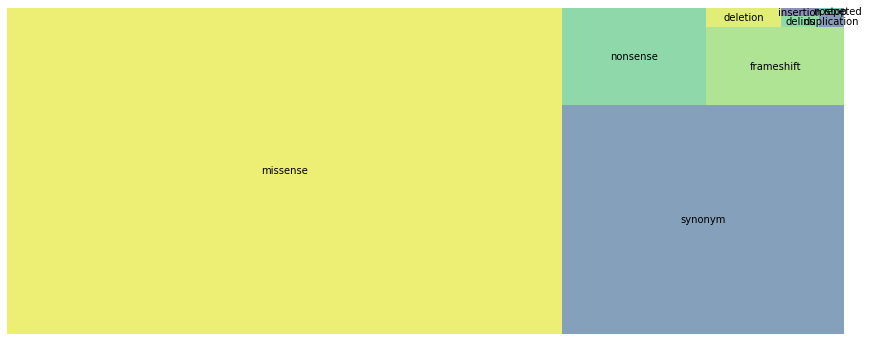

In [38]:
plt.subplots(figsize= (15,6))
squarify.plot(sizes, label= consequence.consequence.tolist(), alpha=0.6 )
plt.axis('off')
plt.show()

# Mutations and Proteins

## Distribution by protein

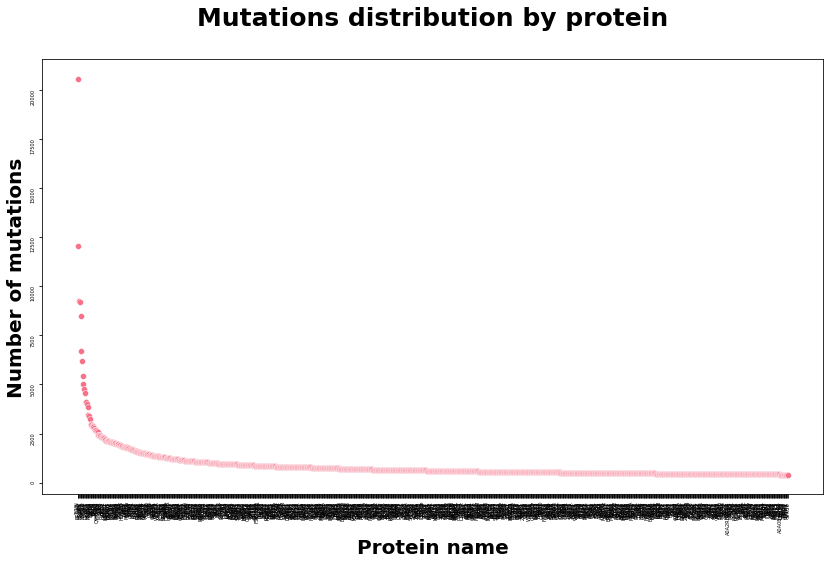

In [76]:
# PLOT top ten mutations in LLPS proteins
#sns.set_style("whitegrid")
sns.set_palette("husl", 10)

bar,ax = plt.subplots(figsize=(14,8))
ax = sns.scatterplot(x= prot_topten.index, y= prot_topten)
ax.set_title("Mutations distribution by protein\n", fontsize=25, weight='bold')
ax.set_ylabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_xlabel ("Protein name", fontsize=20, weight='bold')
ax.tick_params(labelsize=5, rotation=90)
# for i, v in enumerate(prot_topten):
#     ax.text(v, i, str(v), weight='bold', fontsize=14)

plt.show()

## As barplot

(array([  9.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          5.,   0.,   3.,   0.,   0.,   3.,   0.,   6.,   4.,   0.,   0.,
          2.,   3.,   0.,   1.,   3.,   8.,   1.,   7.,   9.,  10.,  23.,
         21.,  33.,  28.,  36.,  52.,  64.,  87.,  79.,  90., 114., 146.,
        150., 153., 149., 192., 220., 240., 223., 232., 262., 261., 241.,
        249., 239., 212., 229., 187., 184., 141., 128., 114.,  88.,  78.,
         57.,  68.,  48.,  30.,  31.,  22.,  24.,  15.,  13.,  13.,  16.,
         10.,   6.,   6.,   5.,   2.,   1.,   4.,   1.,   2.,   1.,   1.,
          1.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.09930714, 0.19861427, 0.29792141, 0.39722854,
        0.49653568, 0.59584281, 0.69514995, 0.79445708, 0.89376422,
        0.99307135, 1.09237849, 1.19168562, 1.29099276, 1.3902999 ,
        1.48960703, 1.58891417, 1.6882213 , 1.78752844, 1.88683557,
        1.98614271, 2.08544984, 2.18475698, 2.

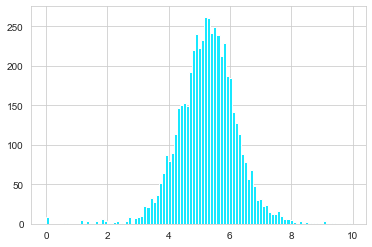

In [104]:
from math import log10
plt.hist(np.log(prot_topten), bins= 100)

<AxesSubplot:xlabel='id_mutation', ylabel='Count'>

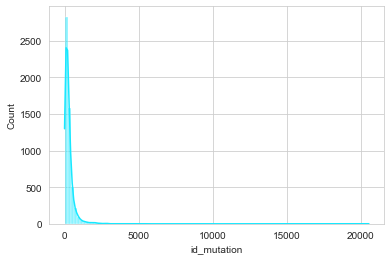

In [105]:
sns.histplot(data= prot_topten, bins=100, kde= True)

In [82]:
prot_mutation

,id_mutation,snp_id,start_aa,end_aa,consequence,uniprot_acc,uniprot_name
0,1,rs184639841,442,442,synonym,Q9ULP9,TBC24
1,2,rs12373107,480,480,synonym,Q9ULP9,TBC24
2,3,rs201059992,500,500,synonym,Q9ULP9,TBC24
3,4,rs189089167,503,503,synonym,Q9ULP9,TBC24
4,5,rs13339237,69,69,synonym,Q9ULP9,TBC24
...,...,...,...,...,...,...,...
1647027,1549229,NaN,3,3,missense,Q9NPJ4,PNRC2
1647028,1549230,NaN,44,44,missense,Q9NPJ4,PNRC2
1647029,1549231,NaN,93,93,missense,Q9NPJ4,PNRC2
1647030,1549232,NaN,37,37,missense,Q9NPJ4,PNRC2


# Mutations by domains

## Pfam data

In [86]:
mutation_pfam = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')
pfam_domain = pd.read_csv('../db_tables/pfam_domain.tsv', sep='\t')
mutation_pfam = mutation_pfam.merge(pfam_domain)

In [87]:
# groupby the column to group on "name". Then, ["id_mutation"] to specify the col to perform the actual aggregation.
pfam = mutation_pfam.groupby('pfam_domain')['id_mutation'].count().sort_values(ascending= False)

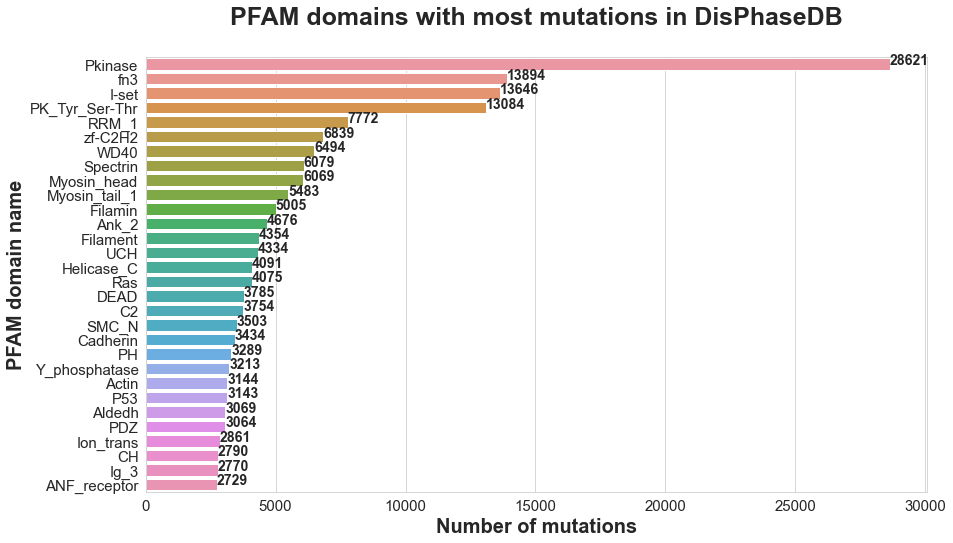

In [90]:
pfam_others = pd.Series({'others': pfam[10:].sum()})
pfam_topten = pfam[:30]
pfam_topten_others= pd.concat([pfam_others, pfam_topten])
# PLOT Top Ten mutations in PFAM domains
# Horizontal barplot
sns.set_style("whitegrid")
sns.set_palette("husl", 1)

bar,ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x= pfam_topten, y= pfam_topten.index, orient='h')
ax.set_title("PFAM domains with most mutations in DisPhaseDB\n", fontsize=25, weight='bold')
ax.set_xlabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_ylabel ("PFAM domain name", fontsize=20, weight='bold')
ax.tick_params(labelsize=15)
for i, v in enumerate(pfam_topten):
    ax.text(v, i, str(v), weight='bold', fontsize=14)

plt.show()

# Others

## PFam formated

In [91]:
rol = pd.read_csv('../db_tables/rol.tsv', sep='\t')
mlo = pd.read_csv('../db_tables/mlo.tsv', sep='\t')
protein_has_mlo = pd.read_csv('../db_tables/protein_has_mlo.tsv', sep='\t').merge(rol).merge(mlo).drop(columns=['id_rol', 'id_mlo'])

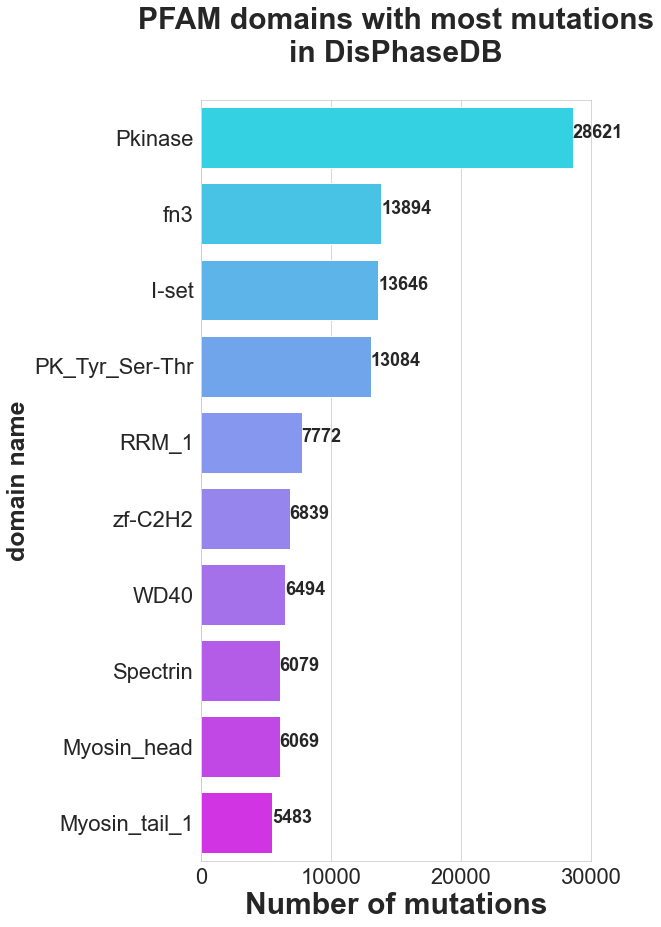

In [92]:
mutation_has_pfam_domain = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')
len(mutation_has_pfam_domain.id_mutation.unique()) # 80837 mutaciones en PFAM domains
len(mutation_has_pfam_domain.id_pfam.unique()) # 1639 PFAM domains con mutaciones

# %% Mutaciones en DOMINIOS PFAM
mutation_pfam = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')

# Verificar si estan las mutaciones que se eliminaron
# Este es un subset son las que ya no van (en este caso 9)
#eliminar = mutation_pfam[~mutation_pfam.id_mutation.isin(mutations.id_mutation)]
# Con esto las elimino:
#mutation_pfam = mutation_pfam[~mutation_pfam.id_mutation.isin(eliminar.id_mutation)]

# %% Traer el nombre de los PFAM acc
pfam_domain = pd.read_csv('../db_tables/pfam_domain.tsv', sep='\t')
mutation_pfam = mutation_pfam.merge(pfam_domain)
# %% Tengo que agrupar 
# groupby the column to group on "name". Then, ["id_mutation"] to specify the col to perform the actual aggregation.
pfam = mutation_pfam.groupby('pfam_domain')['id_mutation'].count().sort_values(ascending= False)
# %%
pfam_others = pd.Series({'others': pfam[10:].sum()})
pfam_topten = pfam[:10]
pfam_topten_others= pd.concat([pfam_others, pfam_topten])
# %% PLOT Top Ten mutations in PFAM domains
# Horizontal barplot
sns.set_style("whitegrid")
sns.set_palette("cool", 10)

bar,ax = plt.subplots(figsize=(7,14))
ax = sns.barplot(x= pfam_topten, y= pfam_topten.index, orient='h')
ax.set_title("PFAM domains with most mutations\nin DisPhaseDB\n", fontsize=30, weight='bold')
ax.set_xlabel ("Number of mutations", fontsize=30, weight='bold')
ax.set_ylabel ("domain name", fontsize=25, weight='bold')
ax.tick_params(labelsize=22)
for i, v in enumerate(pfam_topten):
    ax.text(v, i, str(v), weight='bold', fontsize=18)

plt.savefig("pfam_mutations.png", format='png', dpi=500, bbox_inches='tight')
plt.show()